# Reference graph from nested tuples

See `nested_sequences.ipynb` for a more sophisticated (but more complicated) version that handles more general sequences rather than just tuples.

In [1]:
import html
import itertools

from graphviz import Digraph
from typeguard import typechecked

In [2]:
@typechecked
def build_graph(root: object) -> Digraph:
    """Build a directed graph of references in a nested tuple."""
    graph = Digraph()
    visited_ids = set[int]()
    
    @typechecked
    def draw(node: object) -> None:
        if id(node) in visited_ids:
            return
        
        visited_ids.add(id(node))
        
        if not isinstance(node, tuple):
            graph.node(str(id(node)), label=html.escape(repr(node)))
            return
        
        graph.node(str(id(node)), shape='point')
        
        for child in node:
            draw(child)
            graph.edge(str(id(node)), str(id(child)))
    
    draw(root)
    return graph

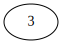

In [3]:
build_graph(3)

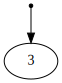

In [4]:
build_graph((3,))

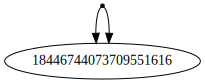

In [5]:
build_graph((2**64, 2**64))

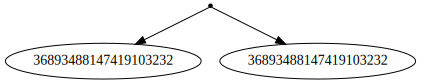

In [6]:
build_graph((2**65, 2**65))

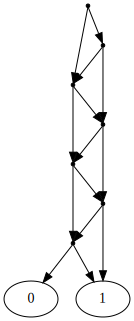

In [7]:
# It is an implementation detail whether structurally equal (sub)tuples
# are the same or different objects. That affects what gets drawn.
t = ((((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1))))),
     (((1, (0, 1)), ((0, 1), (1, (0, 1)))),
      (((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1)))))))
build_graph(t)

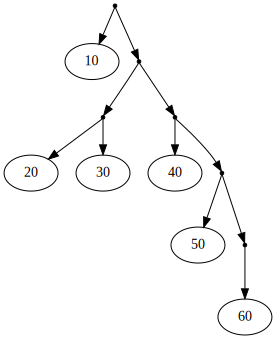

In [8]:
build_graph((10, ((20, 30), (40, (50, (60,))))))

In [9]:
def nest(seed, degree, height):
    return seed if height == 0 else nest((seed,) * degree, degree, height - 1)

In [10]:
t = nest(7, 2, 10)
repr(t).count('7')

1024

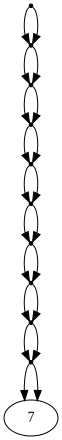

In [11]:
build_graph(t)

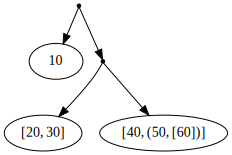

In [12]:
build_graph((10, ([20, 30], [40, (50, [60])])))

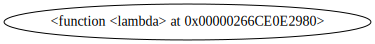

In [13]:
build_graph(lambda x: x)    # Test escaping.